In [ ]:
from hydra import initialize, compose
from pathlib import Path
import pandas as pd
from ergochemics.draw import draw_reaction, draw_molecule
from ergochemics.mapping import rc_to_nest
from IPython.display import SVG
import json

with initialize(version_base=None, config_path="./conf/filepaths"):
    cfg = compose(config_name="filepaths")

In [ ]:
with open(Path(cfg.raw_data) / "pathway" / "sprhea_240310_v3_mapped_no_subunits.json", 'r') as f:
    rhea = json.load(f)
print(len(rhea))
print(len({k: v for k, v in rhea.items() if v['min_rule'] is not None}))

min_rules = pd.read_csv(Path(cfg.rules) / "min_rules.csv", sep=',')

18954
13114


In [ ]:
# To pull out rule of interest

rhea_id = 25250
for k, v in rhea.items():
    if rhea_id in v['rhea_ids']:
        rxn_id = k
        print(k)
        break

ni_id = rhea[rxn_id]['min_rule']
print(ni_id)

for k, v in min_rules.iterrows():
    if ni_id in v['ni_ids']:
        print(v['id'])
        break

641
rule0273
837


In [7]:
fn = "mapped_sprhea_240310_v3_mapped_no_subunits_x_min_rules.parquet"
df = pd.read_parquet(Path(cfg.processed_data) / "pathway" / fn)
df["reaction_center"] = df["reaction_center"].apply(rc_to_nest)
print(len(df))
print(f"{len(df) * 100 / len(rhea):.1f}%")
df.head()

13851
73.1%


rxn_id                                             smarts  \
0      0  NC(CCC=O)C(=O)O.NC(=O)c1ccc[n+](C2OC(COP(=O)(O...   
1      1   CC(O)C(O)C(O)C(O)C(=O)O>>CC(O)C(O)CC(=O)C(=O)O.O   
2     10  CCCCCCCCCCCC(=O)OP(=O)(O)OCC1OC(n2cnc3c(N)ncnc...   
3    100  *C(=O)OCC(COP(=O)(O)OC1C(O)C(OP(=O)(O)O)C(O)C(...   
4   1000  CCC=O.NC(=O)c1ccc[n+](C2OC(COP(=O)(O)OP(=O)(O)...   

                                           am_smarts  \
0  [NH2:7][CH:6]([CH2:5][CH2:3][CH:1]=[O:4])[C:8]...   
1  [CH3:7][CH:5]([OH:8])[CH:4]([OH:6])[CH:1]([OH:...   
2  [CH3:14][CH2:13][CH2:12][CH2:11][CH2:10][CH2:9...   
3  [*:30][C:27](=[O:31])[O:25][CH2:23][CH:22]([CH...   
4  [CH3:5][CH2:3][CH:1]=[O:4].[NH2:13][C:12](=[O:...   

                                                rule  \
0  [#6:1].[#6:2]1:[#6:3]:[#6:4]:[#6:5]:[#7+:6]:[#...   
1  ([#6:1]-[#8:2].[#6:3]-[#8:4])>>([#6:1].[#6:3]=...   
2  [#6:1]-[#8:2].[#8:3]-[#15:4]>>[#6:1]-[#8:3].[#...   
3         [#6:1]-[#8:2].[#8:3]>>[#6:1]-[#8:3].[#8:2]   
4  [#6:1].[#6:2]1:[#6:3]:[#6:4]:[#6:5]:[#7+:6]:[#...   

                                     reaction_center  rule_id  
0  (((4,), (3, 4, 5, 6, 7, 47), (2,)), ((0, 1), (...      819  
1               (((5, 6, 7, 8),), ((0, 1, 2), (0,)))      402  
2             (((11, 13), (2, 1)), ((0, 1), (0, 1)))      994  
3                 (((15, 16), (0,)), ((0, 1), (0,)))      517  
4  (((2,), (3, 4, 5, 6, 7, 47), (0,)), ((0, 1), (...      819

Reaction: 10000


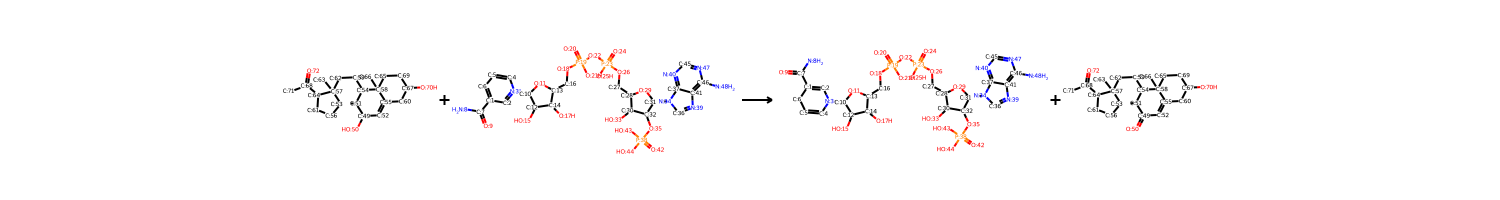

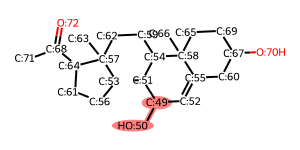

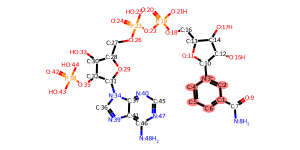

Reaction: 10032


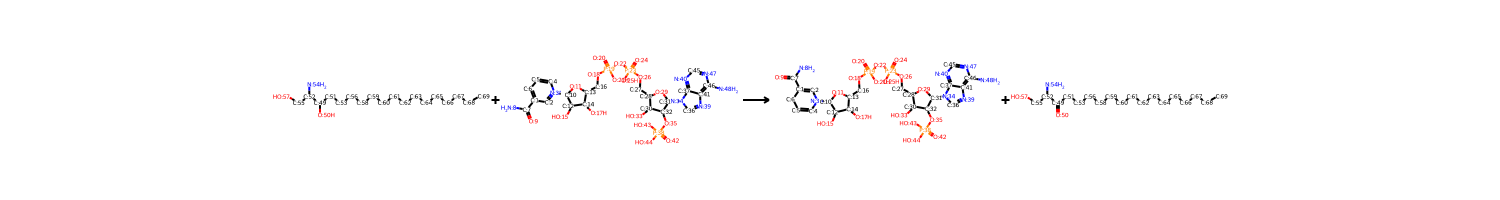

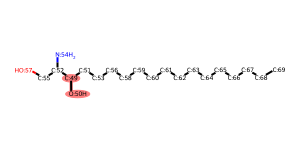

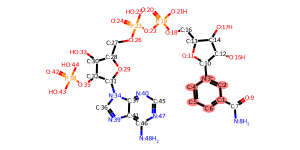

Reaction: 10038


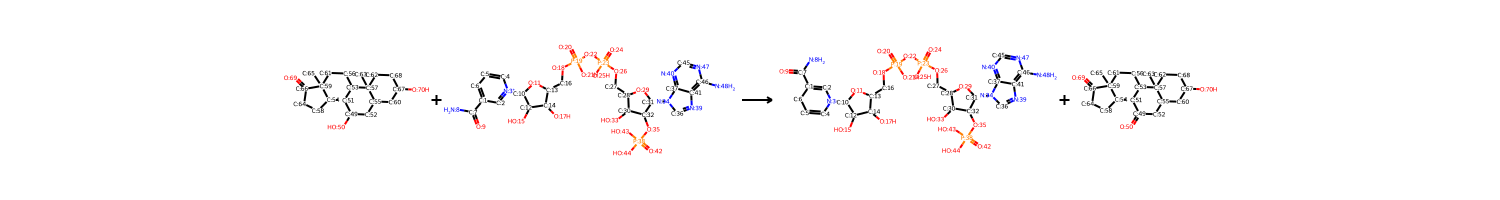

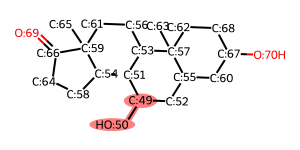

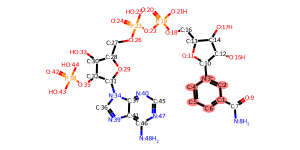

Reaction: 10050


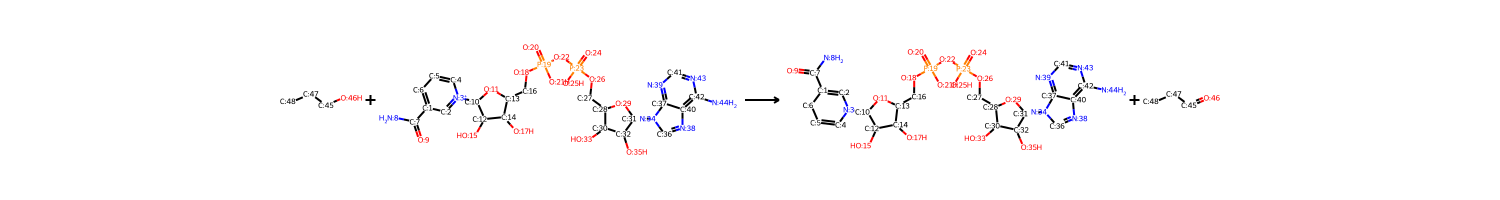

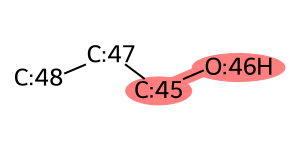

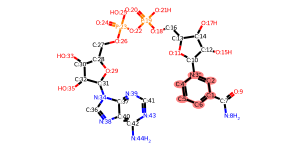

Reaction: 10076


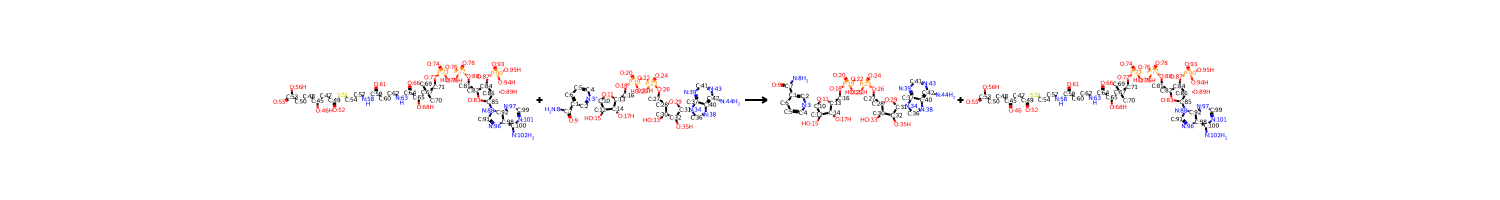

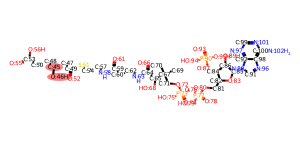

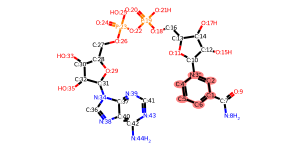

Reaction: 10079


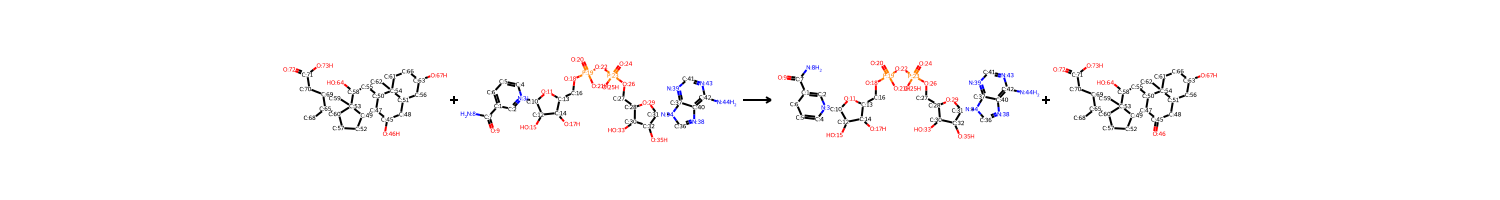

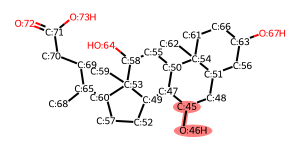

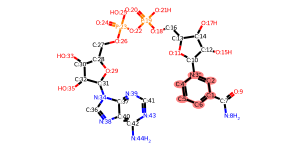

Reaction: 10138


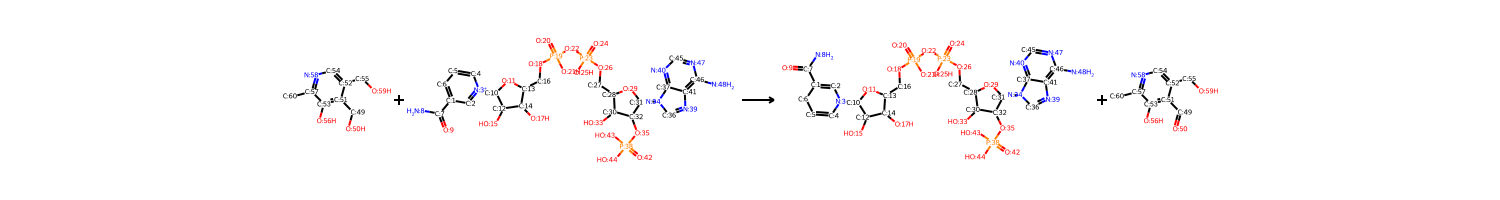

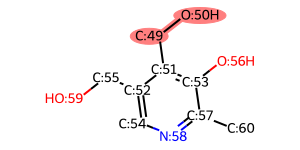

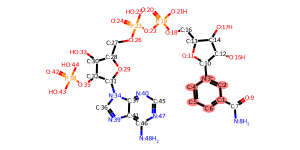

Reaction: 10242


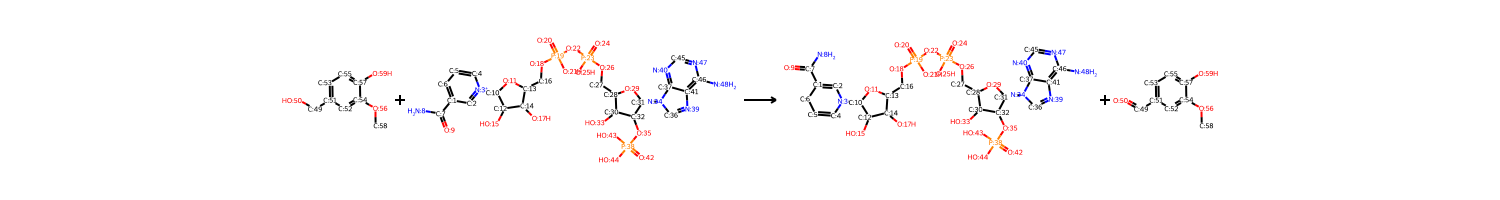

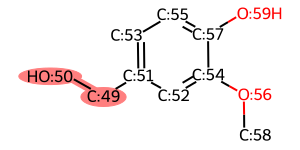

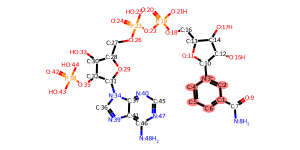

Reaction: 10252


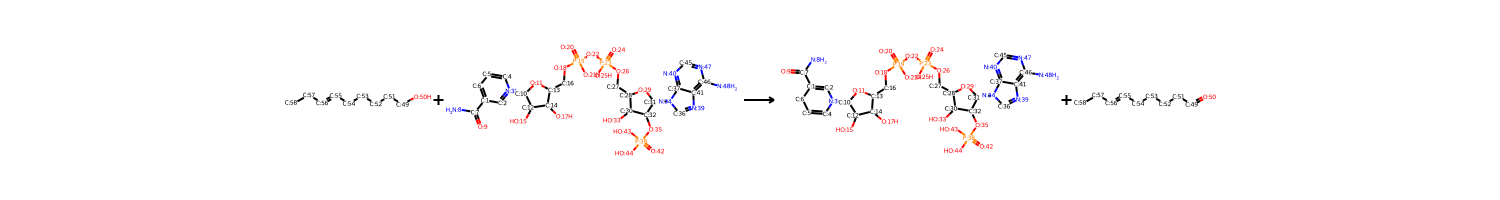

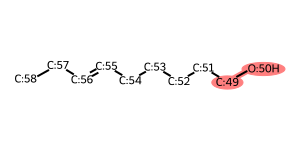

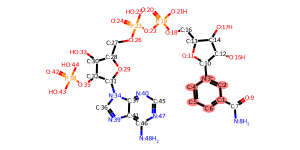

Reaction: 10293


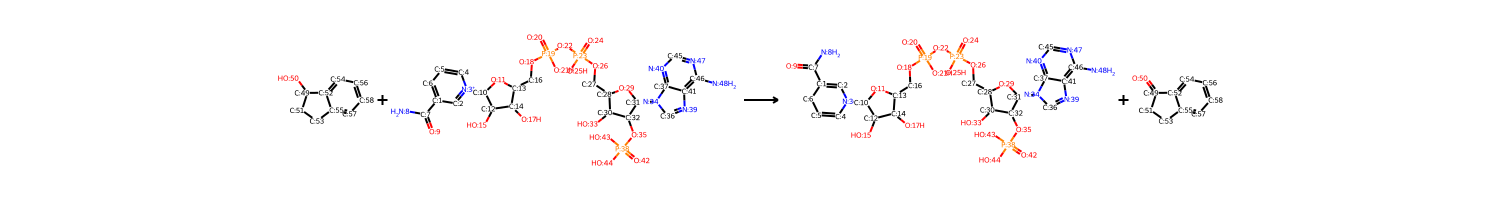

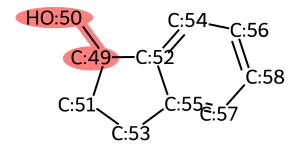

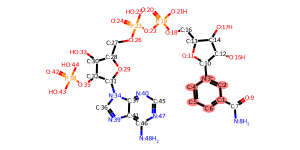

In [11]:
rule_of_i = 435
for _, row in df.loc[df['rule_id'] == rule_of_i].iloc[:10].iterrows():
    print(f"Reaction: {row['rxn_id']}")
    display(SVG(draw_reaction(row["am_smarts"])))
    for smi, rc in zip(row["am_smarts"].split(">>")[0].split("."), row["reaction_center"][0]):
        display(SVG(draw_molecule(smi, size=(300, 150), highlight_atoms=rc)))